<a href="https://colab.research.google.com/github/sohil344/Deep_Learning/blob/main/transfer_learning_feature_extraction(without_data_augmentation)_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [7]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:07<00:00, 298MB/s]
100% 1.06G/1.06G [00:07<00:00, 161MB/s]


In [10]:
import zipfile
zip_ref= zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [12]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [13]:
conv_base=VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [14]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [15]:
model=Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [17]:
conv_base.trainable=False

In [18]:
#genreators

train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [19]:
#Normalize

def process(image,label):
  image=tensorflow.cast(image/255,tensorflow.float32)
  return image,label

train_ds=train_ds.map(process)

In [20]:
validation_ds=validation_ds.map(process)

In [22]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 75s 101ms/step - loss: 0.2725 - accuracy: 0.8849 - val_loss: 0.2361 - val_accuracy: 0.8976
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.1911 - accuracy: 0.9194 - val_loss: 0.2036 - val_accuracy: 0.9140
Epoch 3/10
625/625 [==============================] - 64s 101ms/step - loss: 0.1648 - accuracy: 0.9308 - val_loss: 0.2115 - val_accuracy: 0.9154
Epoch 4/10
625/625 [==============================] - 54s 86ms/step - loss: 0.1316 - accuracy: 0.9469 - val_loss: 0.2479 - val_accuracy: 0.9042
Epoch 5/10
625/625 [==============================] - 54s 85ms/step - loss: 0.1121 - accuracy: 0.9549 - val_loss: 0.2701 - val_accuracy: 0.9032
Epoch 6/10
625/625 [==============================] - 63s 101ms/step - loss: 0.0838 - accuracy: 0.9671 - val_loss: 0.2464 - val_accuracy: 0.9166
Epoch 7/10
625/625 [==============================] - 54s 86ms/step - loss: 0.0638 - accuracy: 0.9750 - val_loss: 0.2716 - val_accur

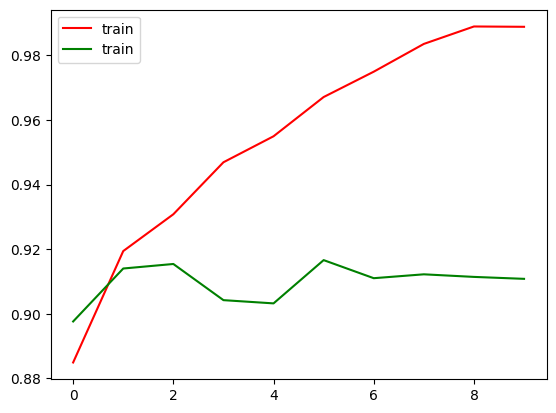

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='green',label='train')
plt.legend()
plt.show()

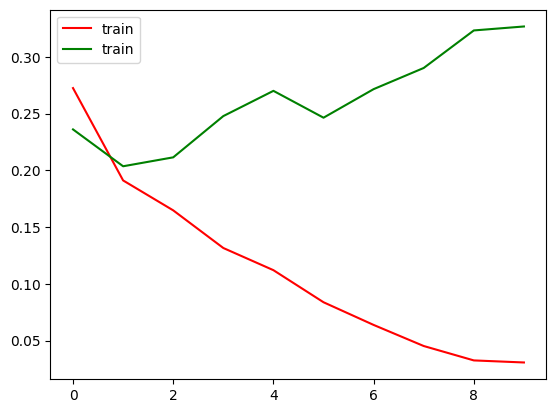

In [25]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='green',label='train')
plt.legend()
plt.show()